<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 48
* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Actividad Semanal 4
* Fecha: 10/10/2022.
* Francisco Medellin Zertuche - A01794044.
* Roberto Romero Vielma - A00822314
* Profesor titular: Jobish Vallikavungal Devassia. 
* Profesor tutor: Roberto Antonio Guevara González.


Importamos la librería pandas

In [1]:
import pandas as pd

Cargamos la base de datos con la función **pandas.read_csv**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv")

Creamos un nuevo dataframe que sea copia del original, para eliminar los registros que se encuentran vacíos y verificar que esto no nos afecte para futuros análisis

In [3]:
ndf=df.copy()
ndf.dropna(inplace = True)
ndf2= ndf.copy()

Primero modificamos la columna X3 para quedarnos solamente con valores dentro de la categoría 4 (otros estudios)

In [4]:
ndf2["X3"] = ndf2[["X3"]].replace([0,5,6],4)

Hacemos lo mismo con la columna X4 para reemplazar los valores 0 con 3 (Otros)

In [5]:
ndf2["X4"]=ndf2[["X4"]].replace(0,3)

Con las columnas X6 a X11 sustituimos el valor de -2 por -1 (Pago oportuno)

In [6]:
slc = ndf2.loc[ : , "X6":"X11"]
for c in slc.columns:
  ndf2[c] = ndf2[[c]].replace(-2,-1)

Tal como se puede observar las columnas X6 a la X11 presentan otro valor que no se menciona en la documentación, el valor **0**, procedemos a reemplazarlo con **-1** dado que es muy probable que sea un error de captura

In [7]:
slc = ndf2.loc[ : , "X6":"X11"]
for c in slc.columns:
  ndf2[c] = ndf2[[c]].replace(0,-1)

In [39]:
df = ndf2.copy()

# Parte 1: Ejercicio guiado 


## Paso 1: 
Determina el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

In [9]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Analisis rapido del DF
df = df.iloc[: , 1:]
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


Verificamos que solo tenemos variables cuantitativas numericas.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      29958 non-null  int64  
 1   X2      29958 non-null  float64
 2   X3      29958 non-null  float64
 3   X4      29958 non-null  float64
 4   X5      29958 non-null  float64
 5   X6      29958 non-null  float64
 6   X7      29958 non-null  float64
 7   X8      29958 non-null  float64
 8   X9      29958 non-null  float64
 9   X10     29958 non-null  float64
 10  X11     29958 non-null  float64
 11  X12     29958 non-null  float64
 12  X13     29958 non-null  float64
 13  X14     29958 non-null  float64
 14  X15     29958 non-null  float64
 15  X16     29958 non-null  float64
 16  X17     29958 non-null  float64
 17  X18     29958 non-null  float64
 18  X19     29958 non-null  float64
 19  X20     29958 non-null  float64
 20  X21     29958 non-null  float64
 21  X22     29958 non-null  float64
 22

El método preprocessing nos sirve para estandarizar el data frame.<br>
La estandarización de los datos es un paso requerido para el metodo PCA.<br>
Al estandarizar, la media de todos los datos será 0 con un rango de -1 a 1. <br>

In [42]:
# Recordatorio: asegurarse de limpiar el df, aqui el df ya ha sido limpiado.
pcs = PCA()
pcs.fit(preprocessing.scale(df)) 

PCA()

La estandarización nos sirve para evitar grandes varianzas entre los componente principales, además de que elimina la mayoría de los outliers dentro del dataset

Analizamos la desviacion estandar, la varianza y la proporcion acumulativa de varianza de los  PCA's.

Medidas de dispersion o variabilidad:

In [43]:
pcsSummary_df = pd.DataFrame({'Desviación estándar': np.sqrt(pcs.explained_variance_),
                             'Proporción de la varianza': pcs.explained_variance_ratio_,
                             'Proporción acumulativa': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Desviación estándar,2.4354,2.0111,1.2854,1.2316,1.0267,1.0105,1.0014,0.9473,0.9403,0.9324,...,0.7313,0.7089,0.5978,0.5131,0.4970,0.4536,0.2661,0.2025,0.1591,0.1524
Proporción de la varianza,0.2471,0.1685,0.0688,0.0632,0.0439,0.0425,0.0418,0.0374,0.0368,0.0362,...,0.0223,0.0209,0.0149,0.0110,0.0103,0.0086,0.0029,0.0017,0.0011,0.0010
Proporción acumulativa,0.2471,0.4156,0.4845,0.5477,0.5916,0.6342,0.6759,0.7133,0.7502,0.7864,...,0.9277,0.9486,0.9635,0.9745,0.9847,0.9933,0.9963,0.9980,0.9990,1.0000


Observamos que despues del PCA 10 tenemos casi el 80%.

<H3>Scree Plot</H3>

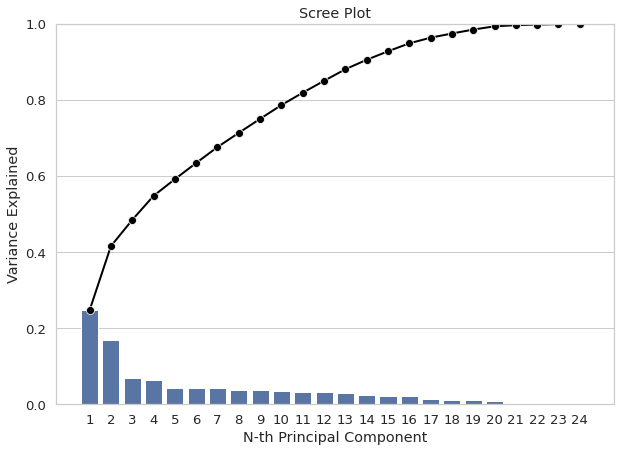

In [44]:
PC_components = np.arange(pcs.n_components_) + 1 # sumamos +1 por que el arrange te da menos -1 el rango
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Observamos que el primer componente es el que tiene mayor cantidad de varianza.

Analizemos que tenemos despues del PCA 10.

In [45]:
summary_df = pcsSummary_df.round(4)
summary_df.iloc[: , 10:]

,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Desviación estándar,0.8830,0.8650,0.8547,0.7730,0.7313,0.7089,0.5978,0.5131,0.4970,0.4536,0.2661,0.2025,0.1591,0.1524
Proporción de la varianza,0.0325,0.0312,0.0304,0.0249,0.0223,0.0209,0.0149,0.0110,0.0103,0.0086,0.0029,0.0017,0.0011,0.0010
Proporción acumulativa,0.8189,0.8500,0.8805,0.9054,0.9277,0.9486,0.9635,0.9745,0.9847,0.9933,0.9963,0.9980,0.9990,1.0000


Tomaremos los primeros 13 componentes principales ya que contienen hasta un 88% de la proporcion de la varianza.

In [46]:
summary_df = pcsSummary_df.round(4)
summary_df.iloc[: , :13]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Desviación estándar,2.4354,2.0111,1.2854,1.2316,1.0267,1.0105,1.0014,0.9473,0.9403,0.9324,0.8830,0.8650,0.8547
Proporción de la varianza,0.2471,0.1685,0.0688,0.0632,0.0439,0.0425,0.0418,0.0374,0.0368,0.0362,0.0325,0.0312,0.0304
Proporción acumulativa,0.2471,0.4156,0.4845,0.5477,0.5916,0.6342,0.6759,0.7133,0.7502,0.7864,0.8189,0.8500,0.8805


In [47]:
pcsSummary_df.iloc[2,12] # Proporcion acumulativa en PC13

0.8804818574869802

**Con esto encontramos que necesitamos los primeros 13 componentes principales que tienen mas del 85% de la varianza total.**

## PASO 2
Interprete cada componente principal en términos de las variables originales

In [48]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df.columns
                                )
pcsComponents_df= pcsComponents_df.iloc[:,:13]
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
X1,0.171849,-0.145291,0.245457,0.099024,-0.472400,-0.185500,0.049117,0.059793,-0.028838,0.022694,0.010968,-0.091734,0.026909
X2,-0.010120,-0.034037,-0.002295,-0.064883,0.235959,-0.680647,0.652836,0.071222,-0.012275,0.021081,0.025566,0.027662,-0.020143
X3,-0.013670,0.053543,-0.189762,0.355543,0.672379,0.127678,0.026576,-0.296683,0.005015,-0.159022,0.071144,0.002446,0.010741
X4,-0.019722,-0.003468,0.003636,-0.638570,0.135299,0.192955,-0.079456,-0.114613,-0.003543,-0.054395,0.044355,-0.020971,-0.009098
X5,0.034358,-0.006523,0.002933,0.664893,-0.132188,0.006937,-0.106824,0.032790,0.001313,0.037407,0.009461,-0.033304,-0.021614
X6,-0.028970,0.356886,0.035780,0.027752,-0.098501,0.264645,0.355319,0.073892,-0.014061,0.014679,-0.015359,-0.225026,0.051988
X7,-0.019367,0.390235,0.046965,0.015826,-0.063583,0.199130,0.264475,-0.000284,-0.009207,-0.016476,-0.013420,-0.373311,0.088781
X8,-0.025193,0.395616,0.089873,-0.003766,-0.014177,0.000845,0.032245,-0.035272,-0.017140,-0.025794,-0.022503,-0.301080,-0.067195
X9,-0.024963,0.401876,0.111870,-0.005123,0.014032,-0.190757,-0.180242,-0.065880,-0.022685,0.009273,-0.038209,-0.017826,-0.007292
X10,-0.020329,0.393672,0.120585,-0.017077,0.021211,-0.277255,-0.280033,-0.048140,-0.005264,0.015935,0.051072,0.180514,0.006548


Examinamos la magnitud y direccion de los coeficientes de las variables originales y buscamos la variable mas importante con mayor peso por cada componente.

In [49]:
c = (pcsComponents_df.PC1.nlargest(1))
dict(c)

{'X15': 0.3892677750234291}

In [53]:
def _max_weigth(pc_name, list_min_max):
  ab=[]
  for dic in list_min_max:
    for key, val in dic.items():
      ab.append(abs(val))
  _max = max(ab)
  for dic in list_min_max:
    for key, val in dic.items():
      if abs(val) == _max:
        return [pc_name, key, val ]
  
pca_var_list = []
for c in pcsComponents_df.columns:
  pca_var_list.append(_max_weigth( c, [ dict(pcsComponents_df[c].nlargest(1)) , dict(pcsComponents_df[c].nsmallest(1)) ])) 
pca_var_list

[['PC1', 'X15', 0.3892677750234291],
 ['PC2', 'X9', 0.4018764144294643],
 ['PC3', 'X19', 0.40249020639440425],
 ['PC4', 'X5', 0.6648930992377106],
 ['PC5', 'X3', 0.6723793385471853],
 ['PC6', 'X2', -0.6806472010005056],
 ['PC7', 'X2', 0.6528360383307233],
 ['PC8', 'X22', -0.7742035975708603],
 ['PC9', 'X23', -0.6185905271862139],
 ['PC10', 'X23', -0.583209390451065],
 ['PC11', 'X20', 0.7882025442336404],
 ['PC12', 'Y', 0.7467247937885427],
 ['PC13', 'X18', -0.7286362927820478]]

## Paso 3
Identifique valores atípicos

In [51]:
df_outlier=df.copy()

In [64]:
# Haremos este anlisis solo en aquellas variables que tienen mas peso en cada componente.
col = list(set([ c[1] for c in pca_var_list ]))
col

['X20', 'X3', 'X23', 'X18', 'X15', 'Y', 'X2', 'X5', 'X22', 'X19', 'X9']

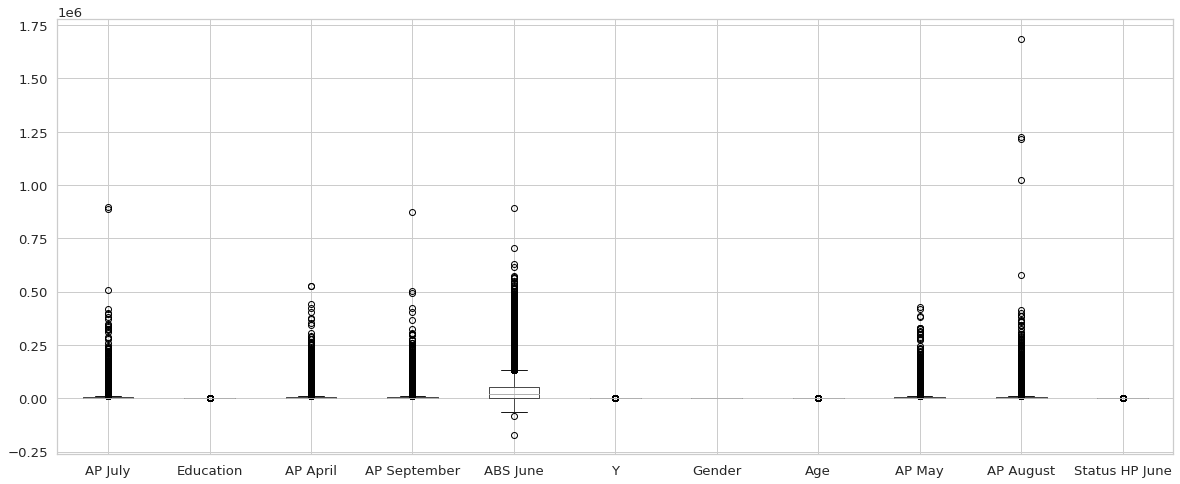

In [72]:
df_outlier = df.copy()[col]
df_outlier.columns =  ["AP July","Education","AP April","AP September","ABS June","Y","Gender","Age","AP May","AP August","Status HP June"]
df_outlier.boxplot(figsize=(20,8))


Con esto deducimos lo siguiente:
- Las variables que mas importan al momento de que se te otorge un credito son las relacionadas con historial de pagos anteriores.
- En AP August es donde tenemos mayor cantidad de valores atipicos, esto significa que unos cuantos clientes pagaron grandes cantidades durante ese mes. Cantidades muy por encima de la media pagada normalmente al mes.